# NLP examples

In [3]:
# Imports
print("Starting imports...")
import nltk
from nltk.corpus import reuters
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from textblob import TextBlob
import seaborn as sns
import numpy as np
import re
import warnings

# Ignore warnings
#warnings.filterwarnings("ignore")

print("Imports done.")


Starting imports...
Imports done.


In [4]:
# Download NLTK corpora
nltk.download('reuters')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package reuters to
[nltk_data]     /Users/tetyanachernenko/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tetyanachernenko/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tetyanachernenko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tetyanachernenko/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# Dataset Reuters from NLTK:
documents = reuters.fileids()
print("Dataset Reuters Total Documents:", len(documents))

# Get categories:
categories = reuters.categories()
print("Dataset Reuters Categories:", len(categories))

Dataset Reuters Total Documents: 10788
Dataset Reuters Categories: 90


In [6]:
# Take 100 docs for demo
documents = documents[:1000]

In [7]:
# Initialize the lists of texts and labels
corpus = []
labels = []

# Upload:
for doc_id in documents:
    corpus.append(reuters.raw(doc_id))
    labels.append(reuters.categories(doc_id))

print("Corpus: ", corpus[:2])
print("\nLabels: ", labels[:10])  # to see multilabels labels

Corpus:  ['ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT\n  Mounting trade friction between the\n  U.S. And Japan has raised fears among many of Asia\'s exporting\n  nations that the row could inflict far-reaching economic\n  damage, businessmen and officials said.\n      They told Reuter correspondents in Asian capitals a U.S.\n  Move against Japan might boost protectionist sentiment in the\n  U.S. And lead to curbs on American imports of their products.\n      But some exporters said that while the conflict would hurt\n  them in the long-run, in the short-term Tokyo\'s loss might be\n  their gain.\n      The U.S. Has said it will impose 300 mln dlrs of tariffs on\n  imports of Japanese electronics goods on April 17, in\n  retaliation for Japan\'s alleged failure to stick to a pact not\n  to sell semiconductors on world markets at below cost.\n      Unofficial Japanese estimates put the impact of the tariffs\n  at 10 billion dlrs and spokesmen for major electronics firms\n  said th

In [8]:
# Convert labels to multilabel format:
multi_labels = []
for label in labels:
    multi_labels.append(','.join(label))
print("Multi Labels: ", multi_labels)

Multi Labels:  ['trade', 'grain', 'crude,nat-gas', 'corn,grain,rice,rubber,sugar,tin,trade', 'palm-oil,veg-oil', 'ship', 'coffee,lumber,palm-oil,rubber,veg-oil', 'grain,wheat', 'gold', 'acq', 'tin', 'interest,money-fx', 'acq,copper', 'ipi', 'carcass,corn,grain,livestock,oilseed,rice,soybean,trade', 'earn', 'earn', 'interest,money-fx', 'bop,trade', 'gas,lead', 'acq', 'jobs', 'earn', 'earn', 'earn', 'earn', 'tin', 'trade', 'zinc', 'sugar', 'sugar', 'acq', 'interest,money-fx', 'cpi,gnp', 'oilseed,palm-oil,soy-oil,soybean,veg-oil', 'earn', 'acq', 'earn', 'trade', 'acq', 'acq', 'earn', 'trade', 'dlr,money-fx,yen', 'cpi', 'interest,money-fx', 'acq', 'sugar', 'sugar', 'earn', 'nickel', 'earn', 'dlr,money-fx', 'acq', 'earn', 'earn', 'acq', 'acq', 'acq', 'groundnut', 'earn', 'ship', 'earn', 'ship', 'earn', 'earn', 'earn', 'interest,money-fx', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'jobs', 'earn', 'acq', 'earn', 'acq', 'earn', 'earn', 'earn', 'sugar', 'money-fx', 'sugar', 'earn', 'earn'

In [9]:
# Create Pandas Dataframe
data = {'text': corpus, 'labels': multi_labels}
df = pd.DataFrame(data)
pd.set_option('display.max_columns', None)
df.head()

text  \
0  ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...   
1  CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...   
2  JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...   
3  THAI TRADE DEFICIT WIDENS IN FIRST QUARTER\n  ...   
4  INDONESIA SEES CPO PRICE RISING SHARPLY\n  Ind...   

                                   labels  
0                                   trade  
1                                   grain  
2                           crude,nat-gas  
3  corn,grain,rice,rubber,sugar,tin,trade  
4                        palm-oil,veg-oil

In [10]:
# Preprocess
def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text)
    # Lowecasing
    words = [word.lower() for word in words]
    # Del stop-words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Del figures and punctuation
    words = [word for word in words if word.isalpha()]
    return ' '.join(words)

# apply:
df['clean_text'] = df['text'].apply(preprocess_text)
df.head()


text  \
0  ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...   
1  CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...   
2  JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...   
3  THAI TRADE DEFICIT WIDENS IN FIRST QUARTER\n  ...   
4  INDONESIA SEES CPO PRICE RISING SHARPLY\n  Ind...   

                                   labels  \
0                                   trade   
1                                   grain   
2                           crude,nat-gas   
3  corn,grain,rice,rubber,sugar,tin,trade   
4                        palm-oil,veg-oil   

                                          clean_text  
0  asian exporter fear damage rift mounting trade...  
1  china daily say vermin eat pct grain stock sur...  
2  japan revise energy demand downwards ministry ...  
3  thai trade deficit widens first quarter thaila...  
4  indonesia see cpo price rising sharply indones...

In [11]:
# Anylyse token frequencies
word_freq = FreqDist(word_tokenize(' '.join(df['clean_text'])))
top_words = word_freq.most_common(20)
print(top_words)


[('said', 2222), ('mln', 1844), ('v', 1332), ('dlrs', 1106), ('pct', 858), ('lt', 741), ('ct', 739), ('net', 648), ('year', 632), ('billion', 558), ('share', 539), ('company', 468), ('tonne', 389), ('loss', 385), ('bank', 385), ('would', 376), ('nil', 369), ('market', 363), ('last', 360), ('shr', 357)]


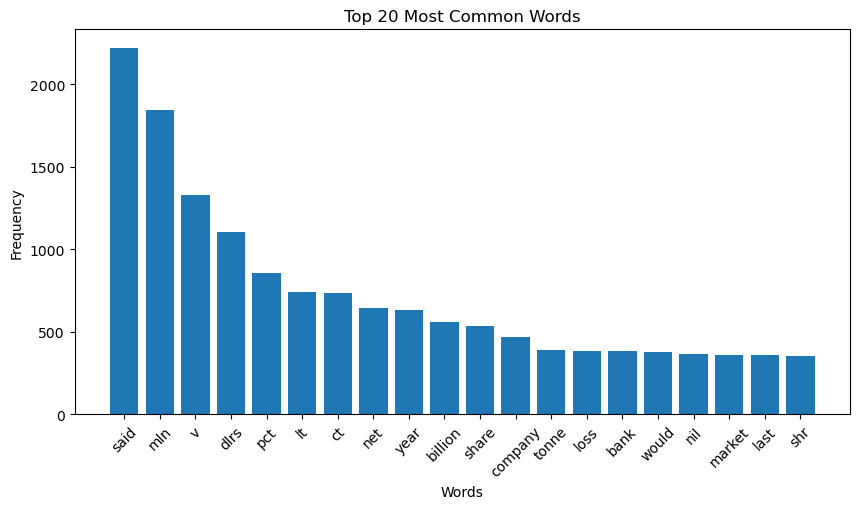

In [12]:
# Visualuze top words:
plt.figure(figsize=(10, 5))
plt.bar(*zip(*top_words))
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



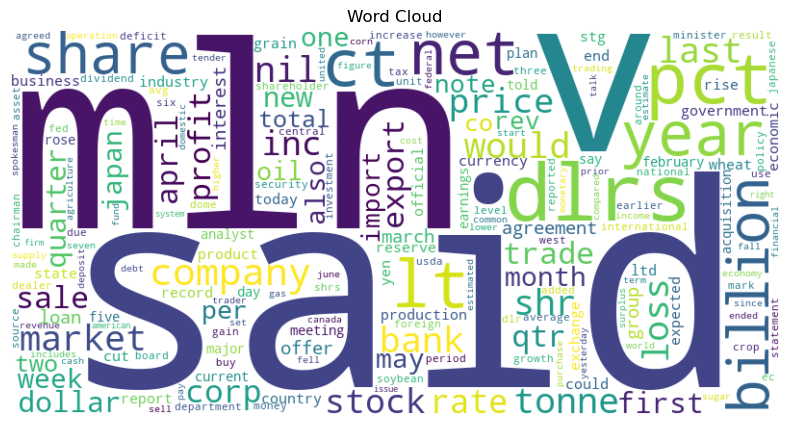

In [13]:
# Cloud of words:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [14]:
# Check null values
missing_values = df.isnull().sum()
print(missing_values)


text          0
labels        0
clean_text    0
dtype: int64


In [15]:
# Анализ статистических характеристик данных
data_statistics = df.describe()
print(data_statistics)


                                                     text labels clean_text
count                                                1000   1000       1000
unique                                                994    122        985
top     JAPAN BUSINESS LEADERS SAY G-7 ACCORD IS WORRY...   earn           
freq                                                    2    409          5


# AgglomerativeClustering, PCA

In [16]:
# Divide into train and test 
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['labels'], test_size=0.2, random_state=42)
# Size
print("Number of docs:", len(X_train))
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


Number of docs: 800


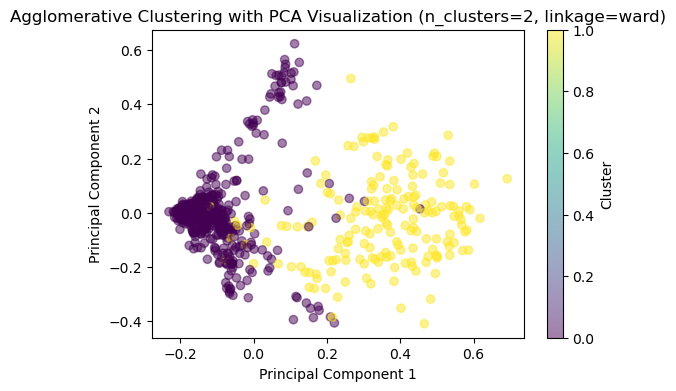

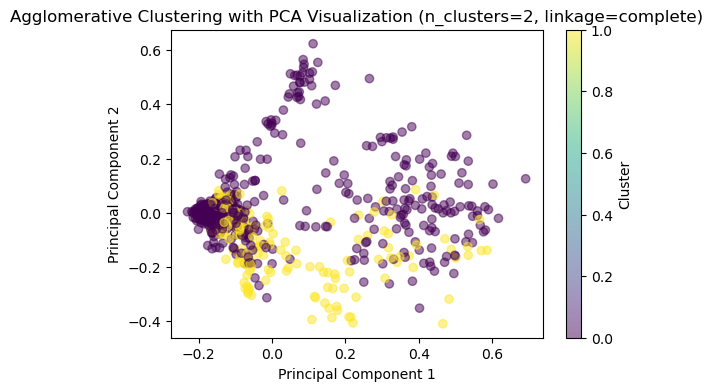

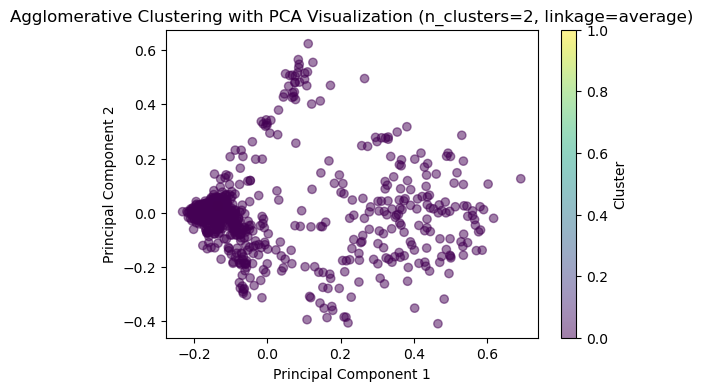

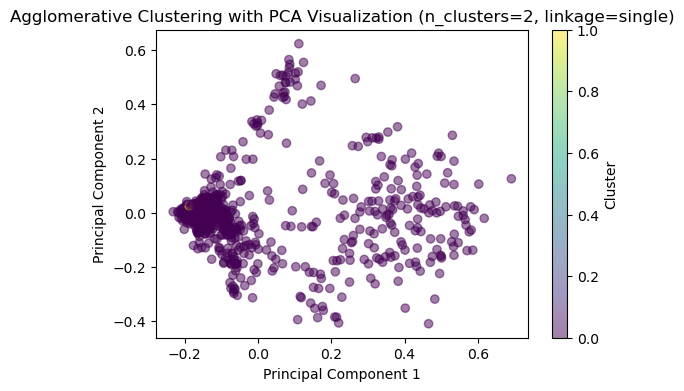

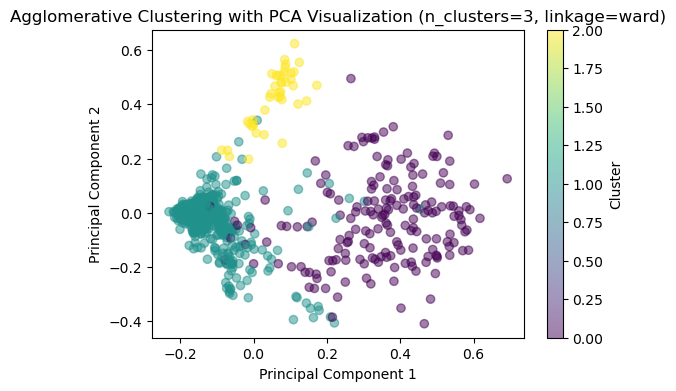

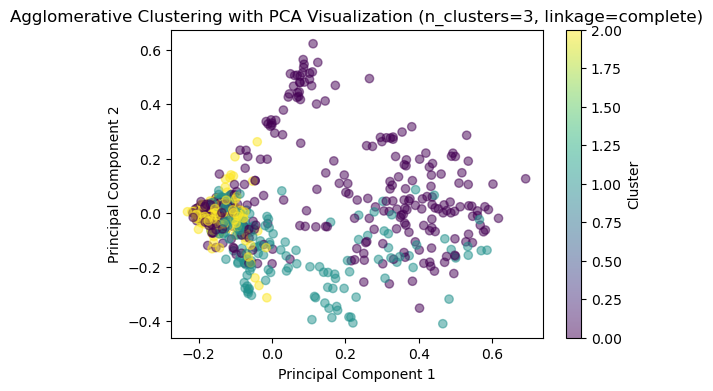

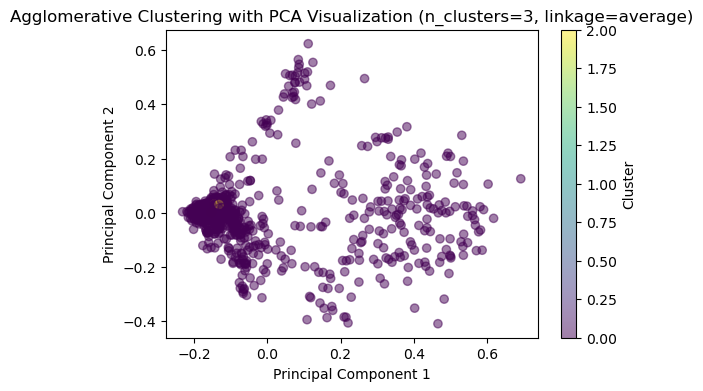

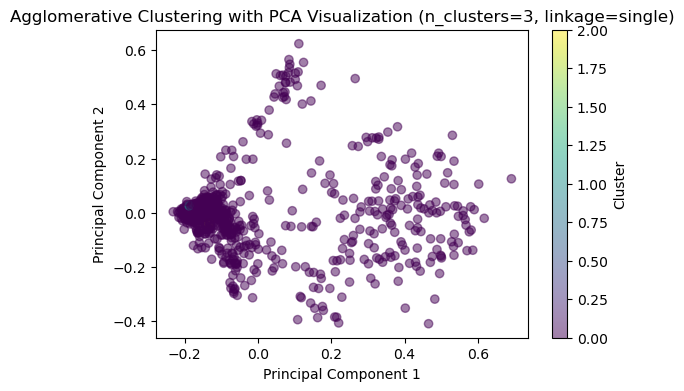

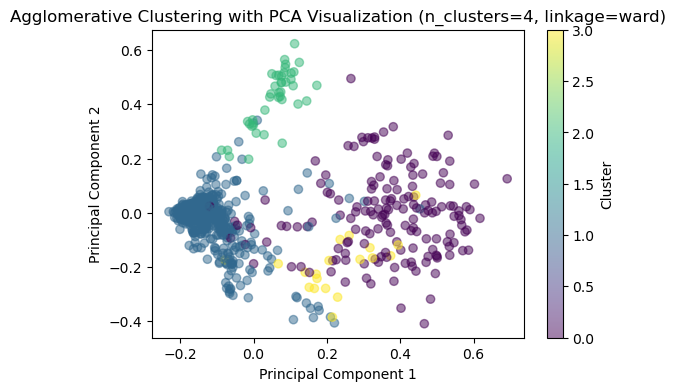

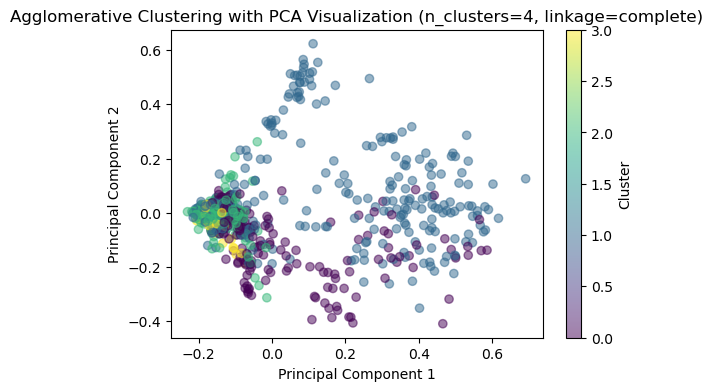

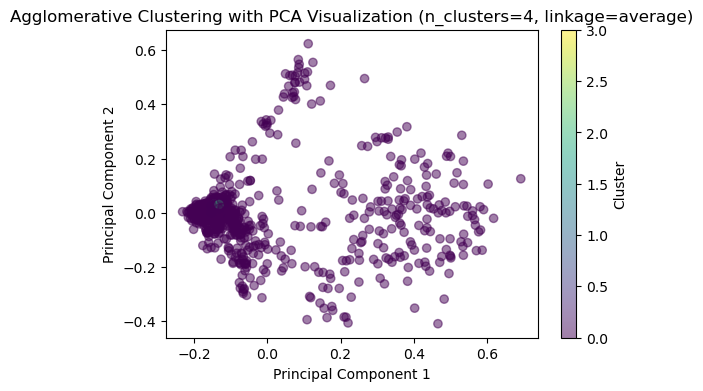

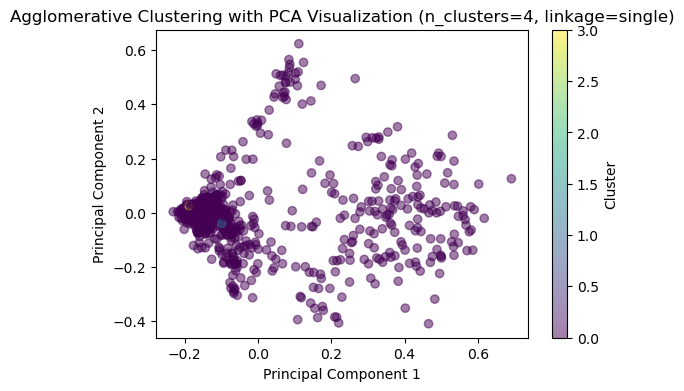

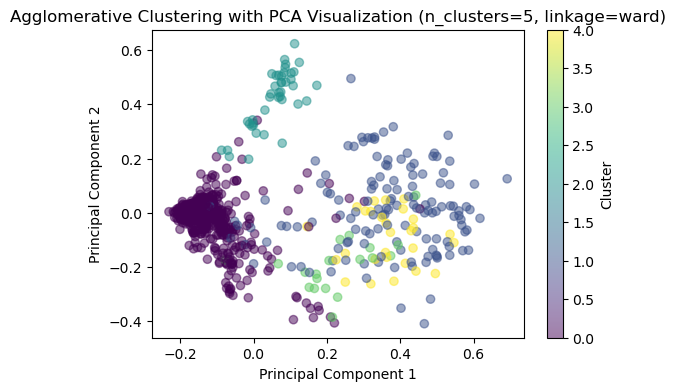

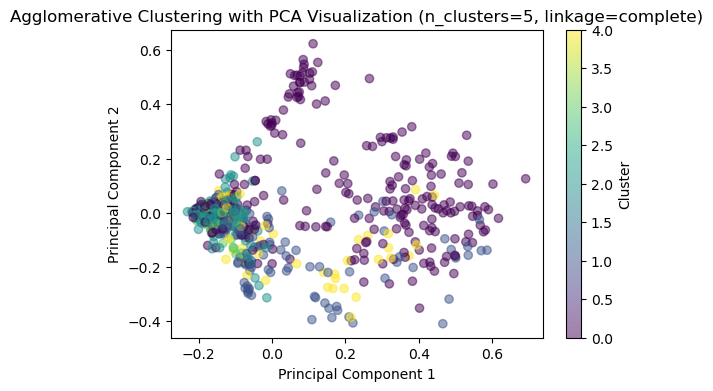

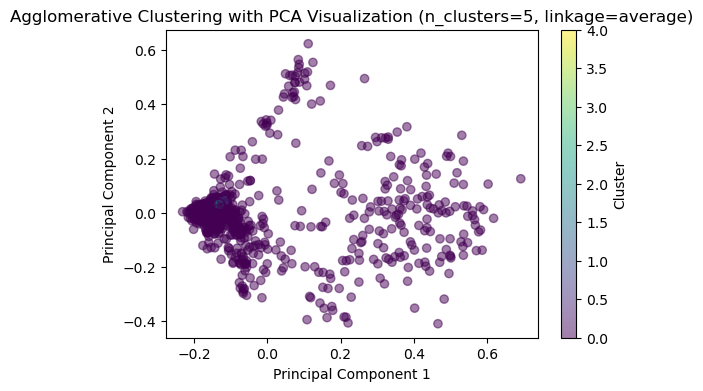

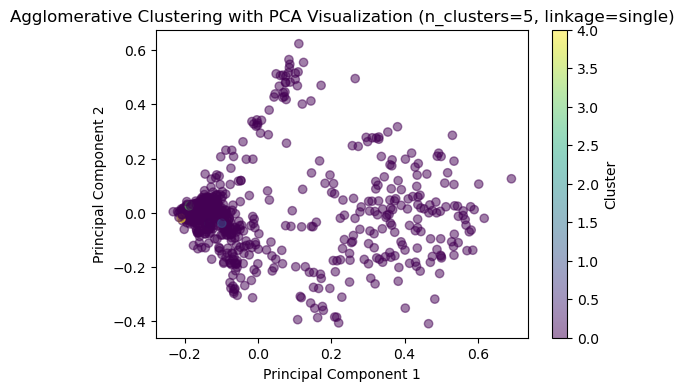

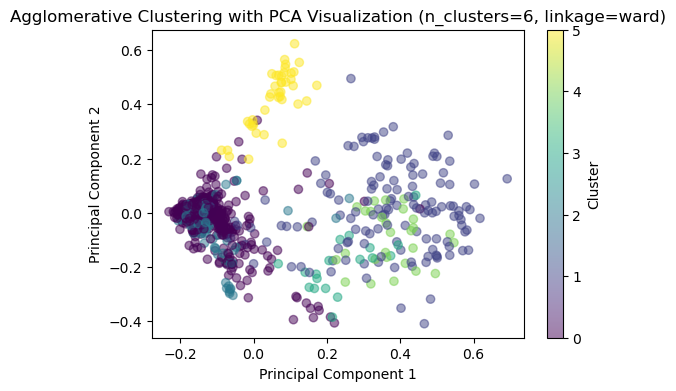

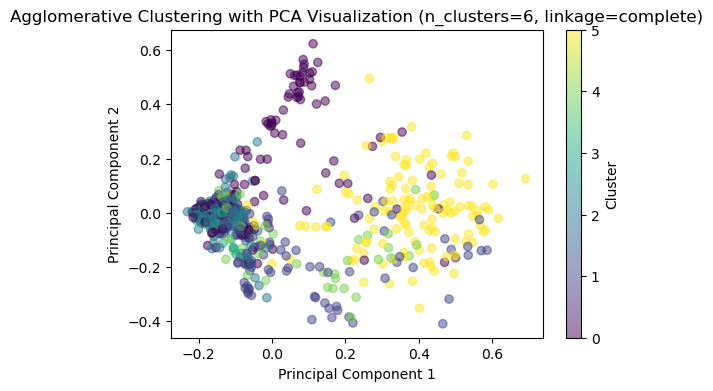

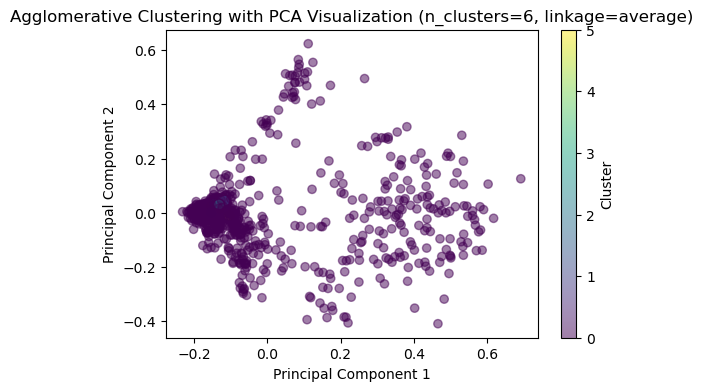

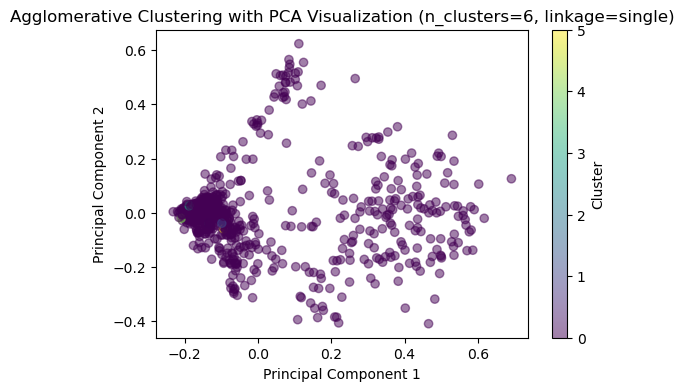

Метрики для всех вариантов:
    n_clusters   linkage  silhouette_score  calinski_harabasz_score
0            2      ward          0.026827                32.739656
1            2  complete          0.005390                 5.562545
2            2   average          0.020334                 1.079884
3            2    single          0.009674                 1.036345
4            3      ward          0.028613                23.401031
5            3  complete          0.008177                 7.583234
6            3   average          0.017475                 1.360911
7            3    single         -0.002418                 1.019772
8            4      ward          0.020672                19.361791
9            4  complete          0.009734                 7.604899
10           4   average          0.015708                 1.437173
11           4    single         -0.010682                 1.009375
12           5      ward          0.017911                16.910599
13           5  comp

In [17]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd

# Определение параметров для тестирования
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6],
    'linkage': ['ward', 'complete', 'average', 'single']
}

results = []

# Перебор всех комбинаций параметров
for n_clusters in param_grid['n_clusters']:
    for linkage in param_grid['linkage']:
        # Создание экземпляра модели иерархической кластеризации
        agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        clusters = agg_clustering.fit_predict(X_train_tfidf.toarray())
        
        # Вычисление метрик
        silhouette_avg = silhouette_score(X_train_tfidf.toarray(), clusters)
        calinski_harabasz = calinski_harabasz_score(X_train_tfidf.toarray(), clusters)
        
        # Визуализация кластеров в двумерном пространстве
        pca = PCA(n_components=2)
        X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
        plt.figure(figsize=(6, 4))
        plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
        plt.title(f'Agglomerative Clustering with PCA Visualization (n_clusters={n_clusters}, linkage={linkage})')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar(label='Cluster')
        plt.show()
        
        results.append({'n_clusters': n_clusters,
                        'linkage': linkage,
                        'silhouette_score': silhouette_avg,
                        'calinski_harabasz_score': calinski_harabasz})

# Создание DataFrame для хранения результатов
results_df = pd.DataFrame(results)

# Вывод метрик для всех вариантов
print("Метрики для всех вариантов:")
print(results_df)

# Нахождение лучших параметров
best_params = results_df.loc[results_df['silhouette_score'].idxmax()]






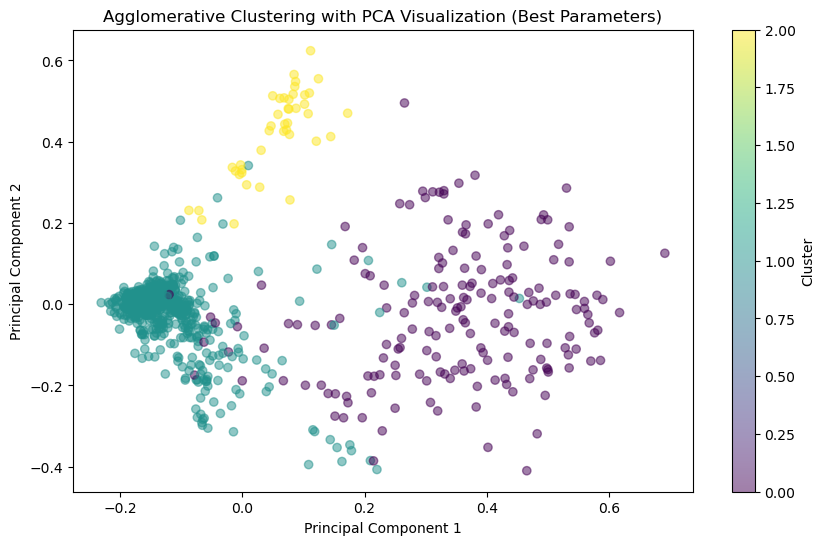

In [18]:
# Визуализация кластеров для лучших параметров
best_agg_clustering = AgglomerativeClustering(n_clusters=best_params['n_clusters'], linkage=best_params['linkage'])
best_clusters = best_agg_clustering.fit_predict(X_train_tfidf.toarray())
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=best_clusters, cmap='viridis', alpha=0.5)
plt.title(f'Agglomerative Clustering with PCA Visualization (Best Parameters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [19]:

# Создание таблицы с метриками для всех вариантов
metrics_table = results_df.pivot_table(index=['n_clusters', 'linkage'], values=['silhouette_score', 'calinski_harabasz_score'])
print("\nТаблица с метриками для всех вариантов:")
print(metrics_table)
# Вывод лучших параметров
print("\nЛучшие параметры:")
print(best_params)


Таблица с метриками для всех вариантов:
                     calinski_harabasz_score  silhouette_score
n_clusters linkage                                            
2          average                  1.079884          0.020334
           complete                 5.562545          0.005390
           single                   1.036345          0.009674
           ward                    32.739656          0.026827
3          average                  1.360911          0.017475
           complete                 7.583234          0.008177
           single                   1.019772         -0.002418
           ward                    23.401031          0.028613
4          average                  1.437173          0.015708
           complete                 7.604899          0.009734
           single                   1.009375         -0.010682
           ward                    19.361791          0.020672
5          average                  1.603450          0.013678
           com

## Results AgglomerativeClustering, PCA

The clustering analysis resulted in three clusters using the Ward linkage method. The obtained Silhouette Score is 0.028613, indicating a reasonable level of cluster cohesion and separation. Additionally, the Calinski-Harabasz Score is 23.401031, which suggests that the clusters are well-defined and distinct. Overall, these metrics indicate that the clustering is effective and provides meaningful groupings of the data.

# Cluster analysis

# Sentiment analysis of every cluster

In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Create an instance of the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Create an empty list to store the results
sentiment_results = []

# Iterate over each cluster and analyze the sentiment of texts
for cluster in sorted(set(best_clusters)):
    # Filter texts belonging to the current cluster
    cluster_texts = X_train[best_clusters == cluster]
    # Analyze sentiment for each text
    scores = [sid.polarity_scores(text) for text in cluster_texts]
    # Calculate average sentiment for the current cluster
    avg_scores = {key: sum(score[key] for score in scores) / len(scores) for key in scores[0]}
    # Append results to the list
    sentiment_results.append({'Cluster': cluster, **avg_scores})

# Convert the list of dictionaries into a DataFrame
sentiment_results_df = pd.DataFrame(sentiment_results)

# Output the results
print("Average Sentiment for Each Cluster:")
print(sentiment_results_df)


Average Sentiment for Each Cluster:
   Cluster       neg       neu       pos  compound
0        0  0.051333  0.852311  0.096383  0.226943
1        1  0.043188  0.836506  0.115068  0.381867
2        2  0.063167  0.894500  0.042333  0.064438


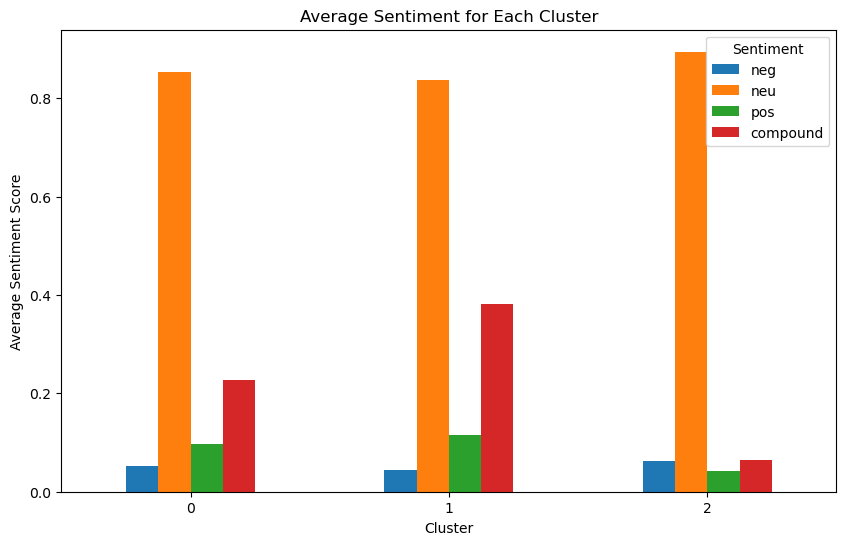

In [21]:
# Set the Cluster column as the index
sentiment_results_df.set_index('Cluster', inplace=True)

# Plot the sentiment analysis results for each cluster
sentiment_results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sentiment for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.show()


Clusters 0 and 1 have a more positive emotional tone, while Cluster 2 is more neutral or even slightly negative.

# Topic Detection with LDA for each cluster

In [22]:
from collections import defaultdict

# Create a dictionary to store text data for each cluster
cluster_text_data = defaultdict(list)

# Iterate over each document and its corresponding cluster label
for text, cluster_label in zip(X_train, best_clusters):
    cluster_text_data[cluster_label].append(text)

# Convert the defaultdict to a regular dictionary
cluster_text_data = dict(cluster_text_data)

print(cluster_text_data)

{1: ['ec sugar tender hard predict london trade outcome today european community ec white sugar tender extremely difficult predict last week substantial award tonne highest ever rebate european currency unit ecus per kilo trader said said believed tonnage would probably smaller around tonne declined give view likely restitution last week european commission accepted tonne sugar intervention operator protesting low rebate might determining factor today result added', 'japan see marginal rise edible oil demand agriculture ministry estimate japan edible oil demand rise pct calendar mln tonne mln domestic consumption rise mln tonne mln import rise tonne export unchanged edible oil supply total mln tonne mln last year including domestic output mln mln domestic supply comprise soybean oil rapeseed oil origin oil', 'usda spring potato estimate agriculture department estimated spring potato production based april condition cwt lb v cwt indicated last year department estimated spring potato are

In [23]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Define the number of topics
num_topics = 5  # You can adjust this number based on your preference

# Initialize CountVectorizer to convert text data into a bag-of-words representation
count_vectorizer = CountVectorizer(max_features=5000, stop_words='english')

# Initialize LDA model
lda_models = {}

# Iterate over each cluster and fit LDA model to identify topics
for cluster_label, text_data in cluster_text_data.items():
    # Convert text data into bag-of-words representation
    X_cluster = count_vectorizer.fit_transform(text_data)
    
    # Fit LDA model
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(X_cluster)
    
    # Store the LDA model for each cluster
    lda_models[cluster_label] = lda
print("LDA model stored")

LDA model stored


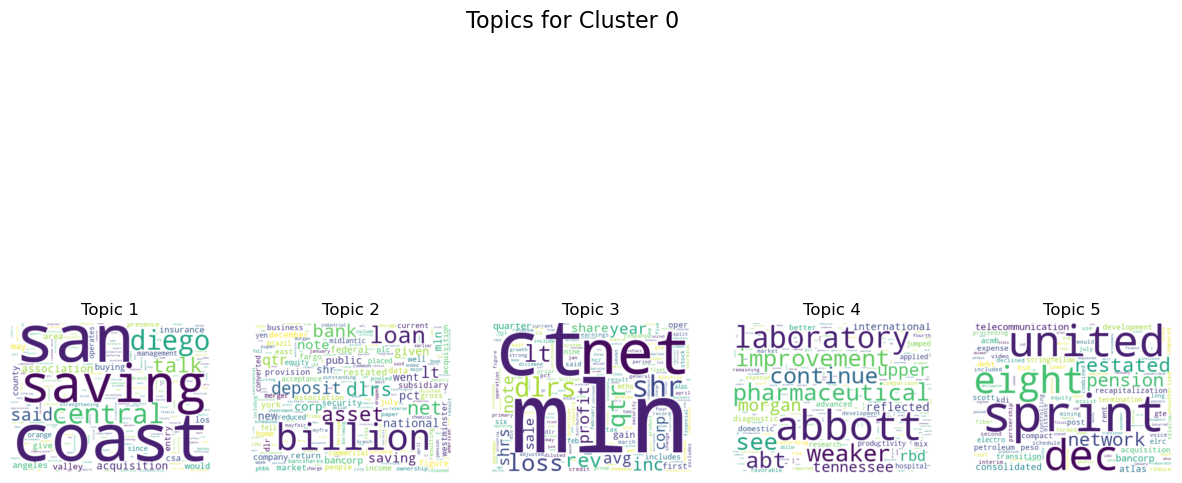

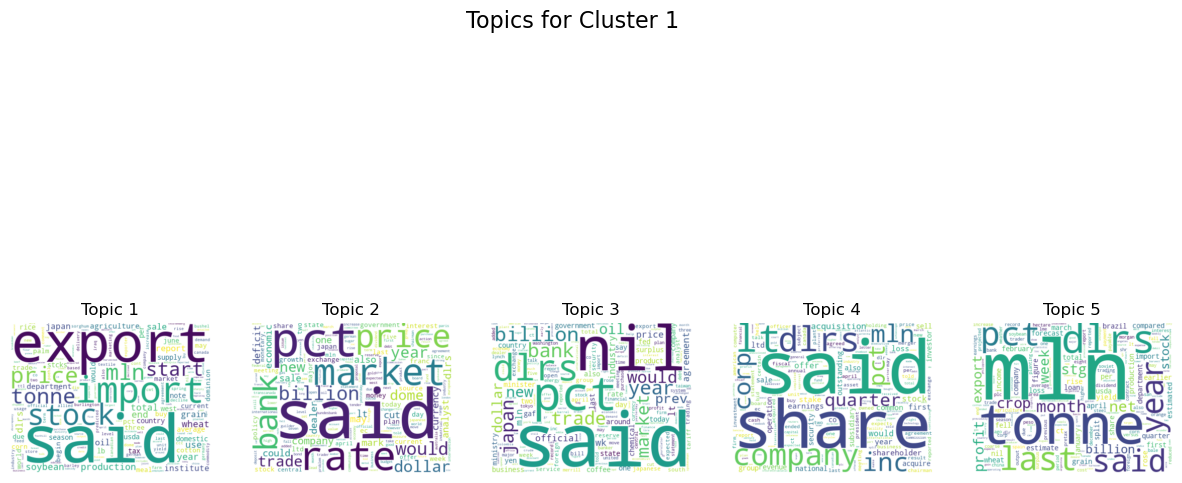

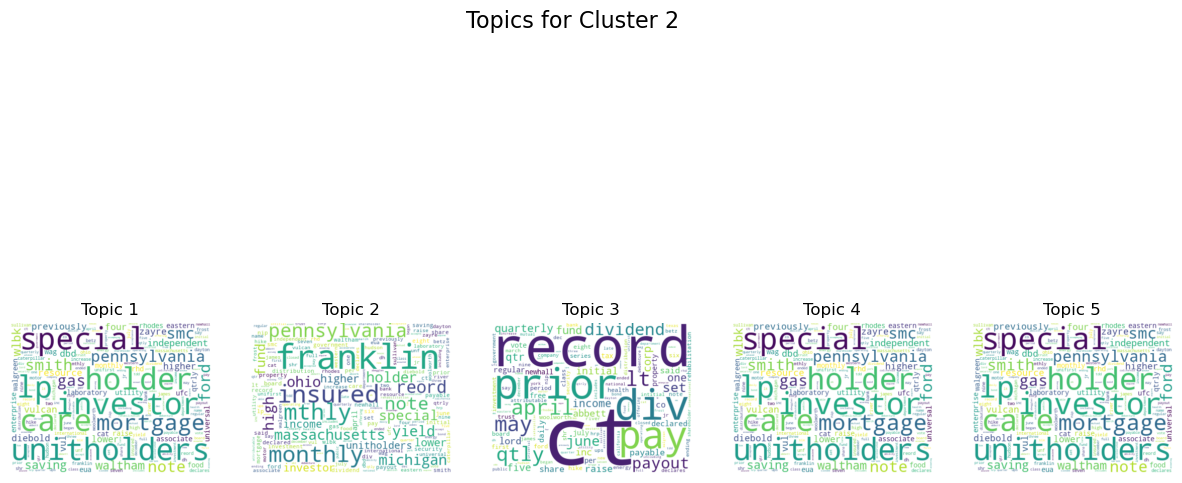

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to visualize topics using word clouds
def visualize_topics(lda_model, feature_names, num_topics, cluster_label):
    # Create a subplots grid
    fig, axes = plt.subplots(1, num_topics, figsize=(15, 8), sharex=True, sharey=True)
    
    # Iterate over each topic
    for topic_idx, topic in enumerate(lda_model.components_):
        # Create a WordCloud object
        wordcloud = WordCloud(width=400, height=300, background_color='white', random_state=42)
        
        # Generate word cloud using the topic's word distribution
        wordcloud.generate_from_frequencies(dict(zip(feature_names, topic)))
        
        # Plot the word cloud
        ax = axes[topic_idx]
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f'Topic {topic_idx + 1}')
        ax.axis('off')
    
    # Set the title for the entire plot
    plt.suptitle(f'Topics for Cluster {cluster_label}', fontsize=16)
    plt.show()

# Function to extract feature names from CountVectorizer
def get_feature_names(vectorizer):
    return vectorizer.get_feature_names_out()

# Create CountVectorizer to convert text data into a bag-of-words representation
count_vectorizer = CountVectorizer(max_features=5000)
X_train_count = count_vectorizer.fit_transform(X_train)

# Define the number of topics for LDA
num_topics = 5

# Dictionary to store LDA models for each cluster
lda_models = {}

# Iterate over each cluster and fit LDA model
for cluster_label in set(best_clusters):
    # Filter documents belonging to the current cluster
    cluster_indices = best_clusters == cluster_label
    cluster_text = X_train[cluster_indices]
    
    # Fit LDA model on the cluster's documents
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(count_vectorizer.transform(cluster_text))
    
    # Store the trained LDA model for the cluster
    lda_models[cluster_label] = lda

# Iterate over each cluster and visualize topics using word clouds
for cluster_label, lda_model in lda_models.items():
    # Extract feature names from CountVectorizer
    feature_names = get_feature_names(count_vectorizer)
    
    # Visualize topics using word clouds
    visualize_topics(lda_model, feature_names, num_topics, cluster_label)


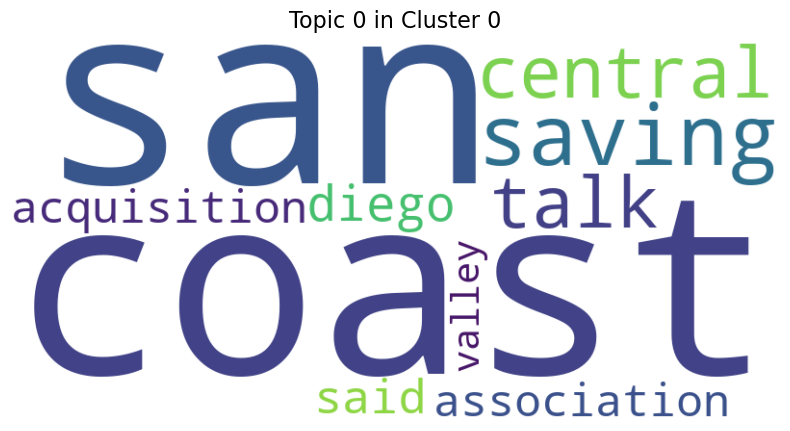

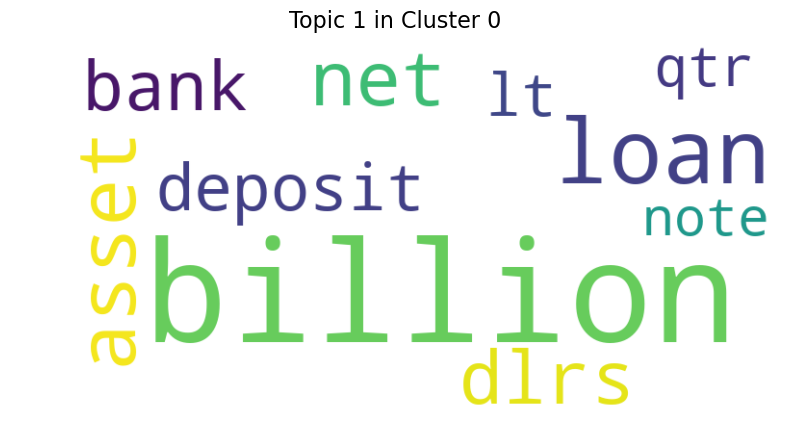

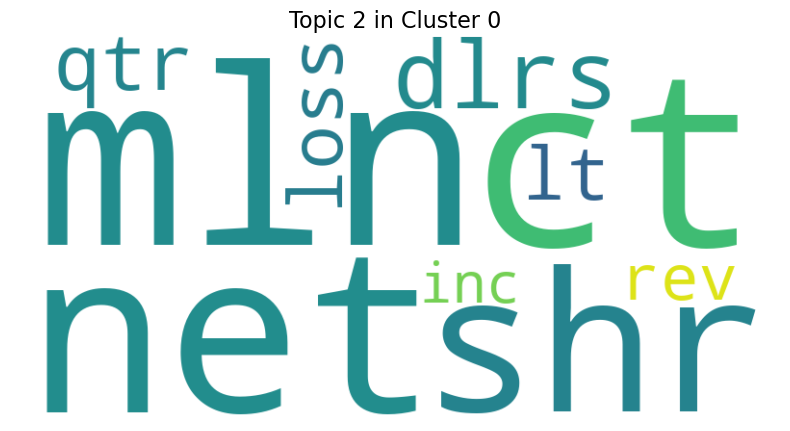

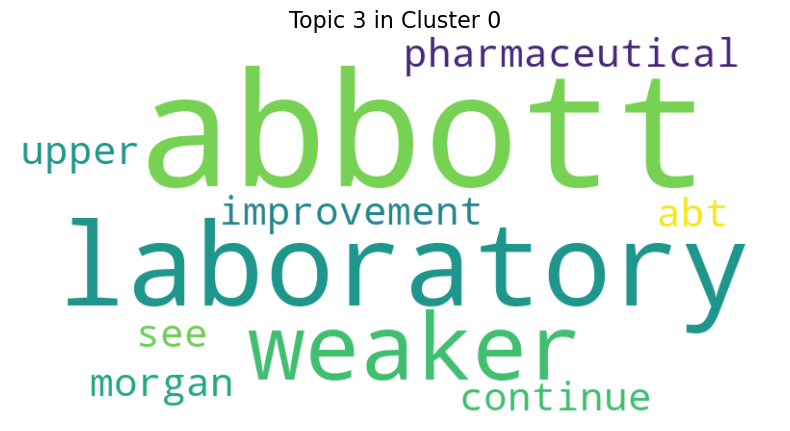

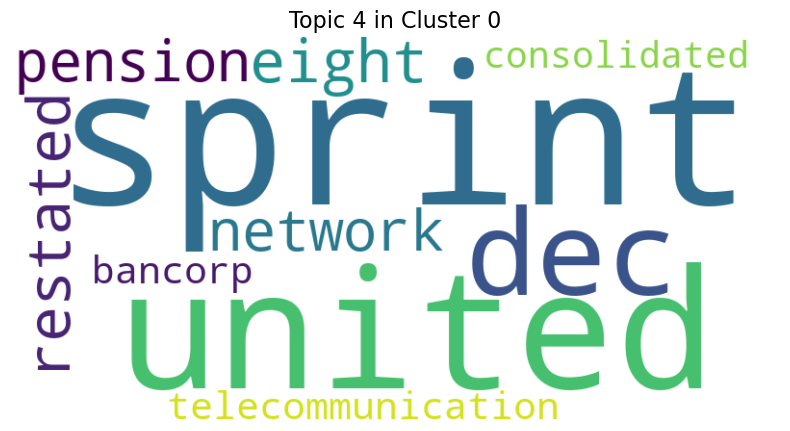

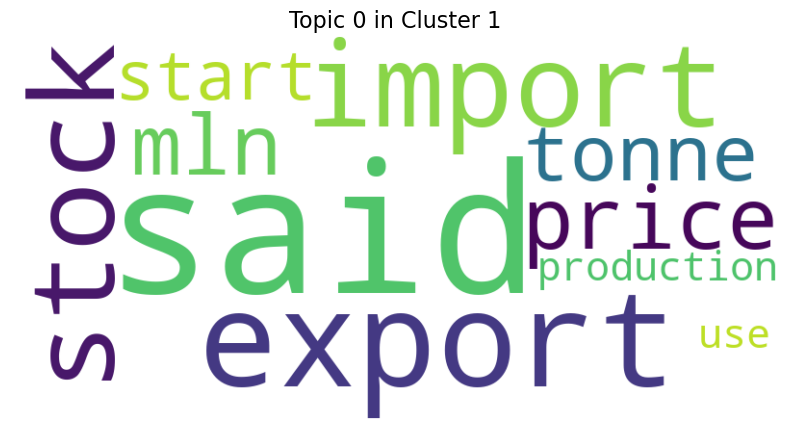

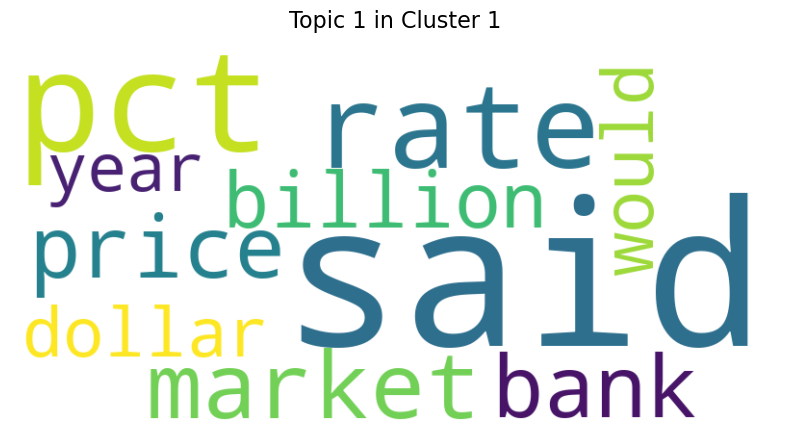

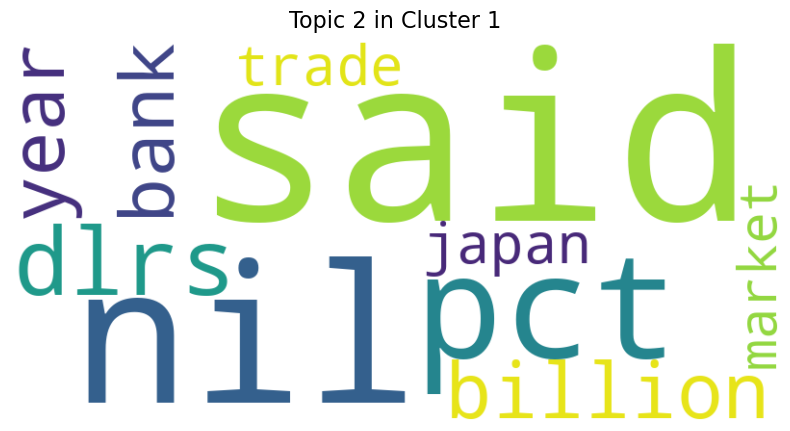

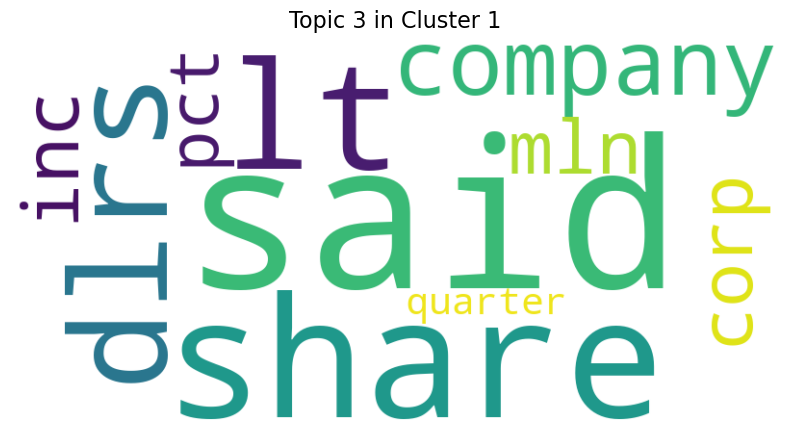

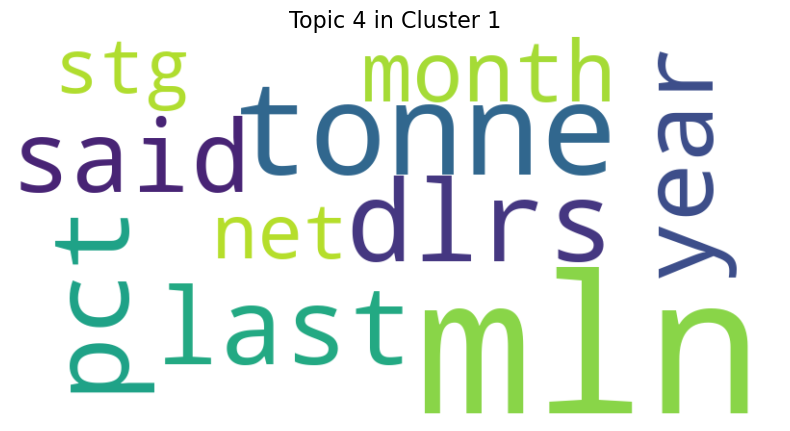

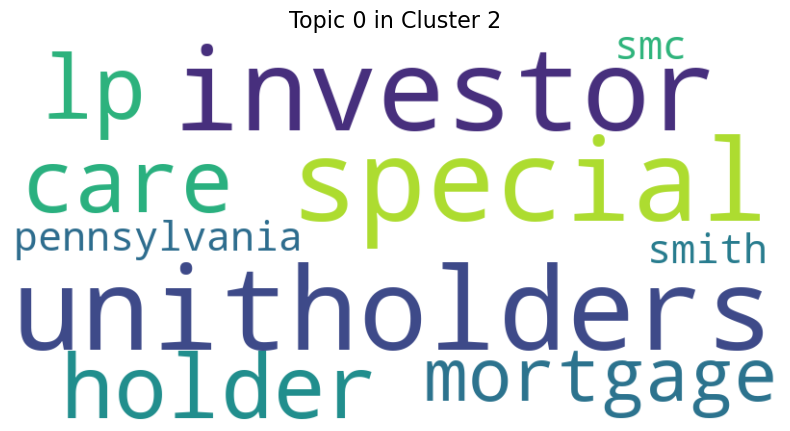

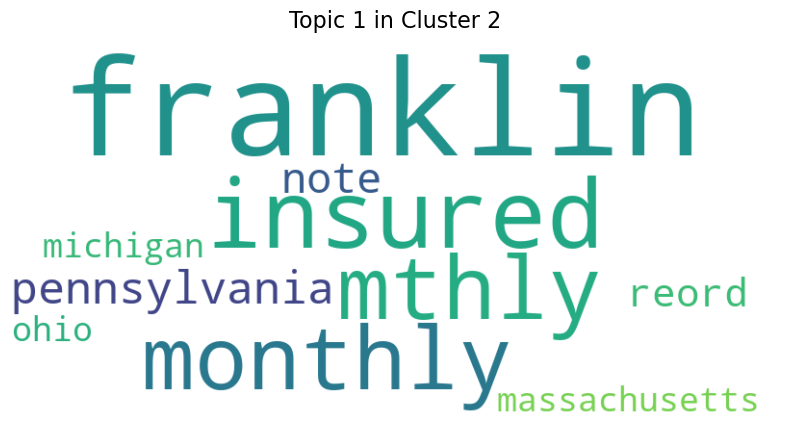

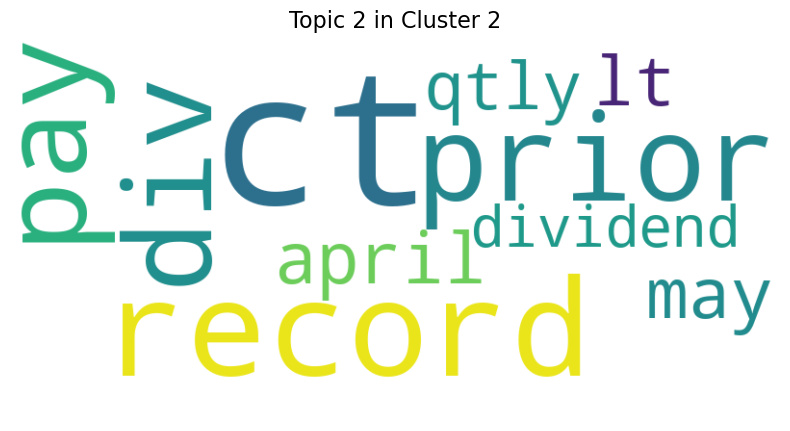

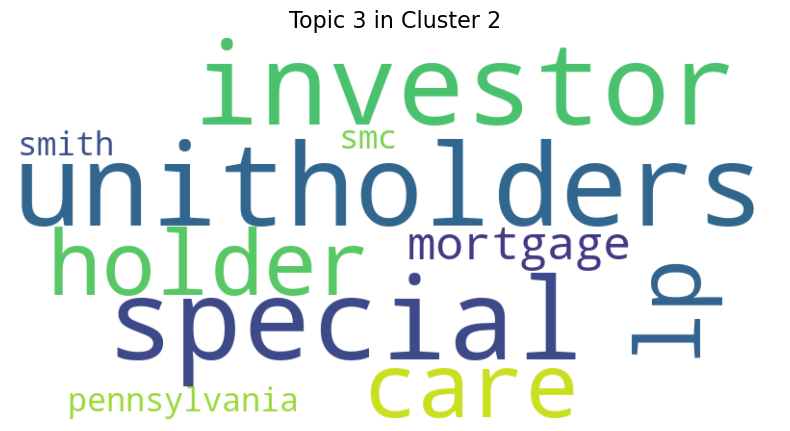

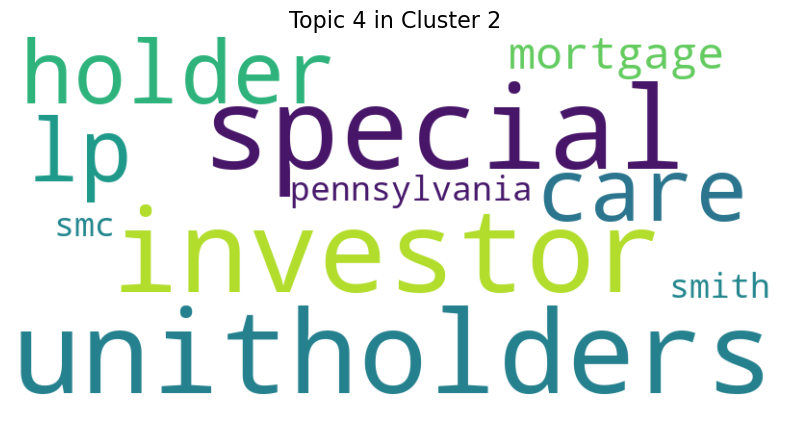

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Функция для создания облака слов для каждой темы
def visualize_topics(lda_model, feature_names, num_topics, cluster_label):
    # Создаем облако слов для каждой темы
    for topic_idx, topic in enumerate(lda_model.components_):
        # Получаем список слов и их весов для текущей темы
        words = [(feature_names[i], topic[i]) for i in topic.argsort()[:-11:-1]]  # Топ 10 слов для каждой темы
        # Создаем облако слов
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(words))
        # Визуализируем облако слов
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Topic {topic_idx} in Cluster {cluster_label}', fontsize=16)
        plt.axis('off')
        plt.show()

# Iterate over each cluster and visualize topics using word clouds
for cluster_label, lda_model in lda_models.items():
    # Extract feature names from TfidfVectorizer
    feature_names = tfidf_vectorizer.get_feature_names_out()
    # Visualize topics using word clouds
    visualize_topics(lda_model, feature_names, num_topics, cluster_label)


# Create names for clusters, try TOP WORDS

In [26]:
# Создаем пустой словарь для хранения текстов по кластерам
cluster_texts = {}

# Добавляем тексты в словарь, где ключом является метка кластера, а значением - список текстов
for cluster_label, text in zip(best_clusters, X_train):
    if cluster_label not in cluster_texts:
        cluster_texts[cluster_label] = []
    cluster_texts[cluster_label].append(text)

# Выводим тексты для каждого кластера
for cluster_label, texts in cluster_texts.items():
    print(f"Cluster {cluster_label}:")
    for text in texts:
        print(text)
        print("------------")
    print("\n")


Cluster 1:
ec sugar tender hard predict london trade outcome today european community ec white sugar tender extremely difficult predict last week substantial award tonne highest ever rebate european currency unit ecus per kilo trader said said believed tonnage would probably smaller around tonne declined give view likely restitution last week european commission accepted tonne sugar intervention operator protesting low rebate might determining factor today result added
------------
japan see marginal rise edible oil demand agriculture ministry estimate japan edible oil demand rise pct calendar mln tonne mln domestic consumption rise mln tonne mln import rise tonne export unchanged edible oil supply total mln tonne mln last year including domestic output mln mln domestic supply comprise soybean oil rapeseed oil origin oil
------------
usda spring potato estimate agriculture department estimated spring potato production based april condition cwt lb v cwt indicated last year department es

In [27]:
from collections import Counter

# Функция для определения названия кластера на основе наиболее часто встречающихся слов
def get_cluster_names(X, clusters, num_clusters=3, top_n_words=5):
    cluster_names = {}
    for cluster_label in range(num_clusters):
        cluster_texts = X[clusters == cluster_label]
        # Собираем все слова в кластере
        words = ' '.join(cluster_texts).split()
        # Выбираем наиболее часто встречающиеся слова
        top_words = [word for word, _ in Counter(words).most_common(top_n_words)]
        # Используем первые top_n_words слов в качестве названия кластера
        cluster_name = ' '.join(top_words)
        cluster_names[cluster_label] = cluster_name
    return cluster_names

# Получаем названия кластеров
cluster_names = get_cluster_names(X_train, best_clusters)
print(cluster_names)



{0: 'v mln ct net shr', 1: 'said mln pct dlrs year', 2: 'ct record v div prior'}


Not perfect

# Create names for clusters, try LDA, keywords, use gensim

In [28]:
from collections import Counter
from gensim import corpora, models

def get_topic_keywords(lda_model):
    topic_keywords = {}
    for i, topic in lda_model.show_topics(formatted=False):
        topic_keywords[i] = [word for word, _ in topic]
    return topic_keywords

def choose_cluster_names(lda_model, clusters, X_train, num_topics=3):
    cluster_names = {}
    for cluster_label in set(clusters):
        cluster_texts = X_train[clusters == cluster_label]
        corpus = [text.split() for text in cluster_texts]
        dictionary = corpora.Dictionary(corpus)
        corpus = [dictionary.doc2bow(text) for text in corpus]

        lda_model_cluster = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

        topic_keywords = get_topic_keywords(lda_model_cluster)

        # Combine all top words into one string
        all_words = ' '.join(word for topic_words in topic_keywords.values() for word in topic_words)

        # Choose the most common words
        most_common_words = ' '.join(word for word, _ in Counter(all_words.split()).most_common(5))

        cluster_names[cluster_label] = most_common_words
    return cluster_names

# Get cluster names
cluster_names = choose_cluster_names(lda_model, best_clusters, X_train)

# Print cluster names
for cluster_label, name in cluster_names.items():
    print(f"Cluster {cluster_label}: {name}")


Cluster 0: mln dlrs v net shr
Cluster 1: said dlrs pct lt share
Cluster 2: ct record div v prior


=> not perfect